In [1]:
%%javascript
// Disable auto-scroll on plots
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

<IPython.core.display.Javascript object>

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

np.random.seed(9291)
# Bria_01_n

In [3]:
# Load the annotations
ann_df = pd.read_csv('../annotations/Brian/csv/brian_01_n_ann.csv')

# Select the gesture type, start-time, end-time and duration columns
ann_df = ann_df[['type', 'start_time', 'end_time', 'during_time']]

# Rename 'during_time' column to 'duration'
ann_df = ann_df.rename(columns={"during_time": "duration"})

# Convert the 'duration' column to an integer
ann_df = ann_df.astype({'start_time': 'int32', 'end_time': 'int32', 'duration': 'int32'})

# Convert the units from milliseconds to frames (/1000 and *100)
ann_df.loc[:, ['start_time', 'end_time', 'duration']] //= 10

In [4]:
# Load rotation vectors and translations
rov_trans_df = pd.read_csv('../params/Bria/Normalized/rov.csv/Bria_01_n.rov.csv')

# Convert the 'duration' column to an integer
rov_trans_df = rov_trans_df.astype(np.float64)

# Create a separate dataframe for just the rotation vectors
rov_df = rov_trans_df[['Rx', 'Ry', 'Rz']]

# Create a separate dataframe for just the translation vectors
trans_df = rov_trans_df[['Tx', 'Ty', 'Tz']]

In [5]:
# Create a mapping for the head gesture labels to full names
gestures = {
    "nd":  ("Nod", "Down-up motion"),
    "mnd": ("Multiple nods", "Sequence of multiple nods"),
    "fu":  ("Face up", "Face moves in the upward direction"),
    "fd":  ("Face down", "Face moves in the downward direction"),
    "sh":  ("Shake", "Head shakes (left-right motion)"),
    "ti":  ("Tilt", "Head tilts (to the left or right)"),
    "t":   ("Turn", "Left or right head turn (partial shake)")
}

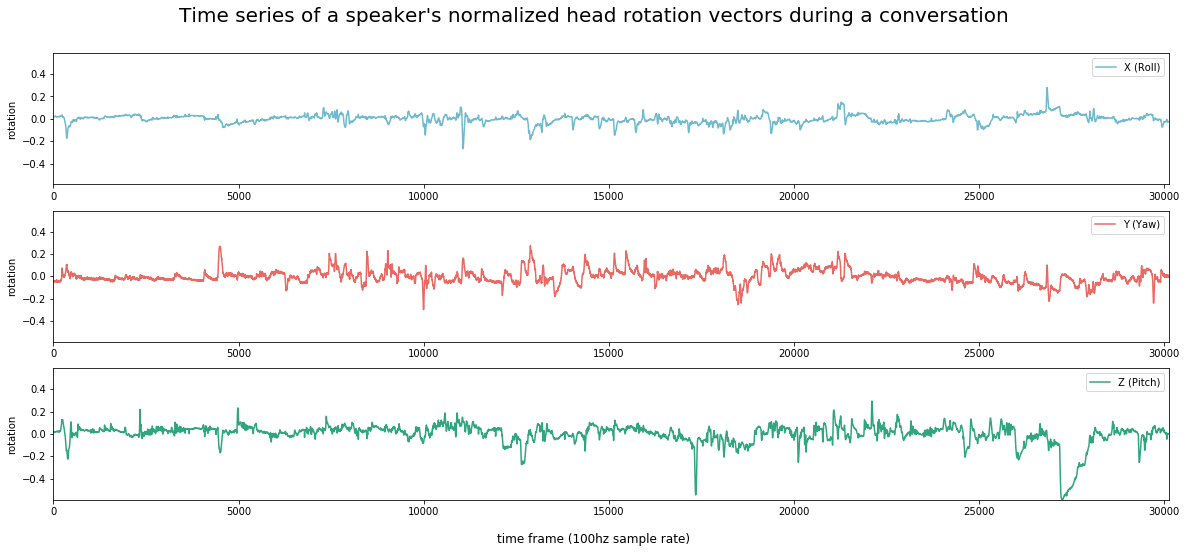

In [6]:
# Configure subplots, figure size, spacing and title
fig, axs = plt.subplots(3, 1, figsize=(20, 8))
fig.subplots_adjust(hspace=0.2, top=0.9) # Top gives space for title
fig.suptitle("Time series of a speaker's normalized head rotation vectors during a conversation", fontsize=20)

colors = ['#70bacf', '#eb6963', '#30a67f']

for i, (r, name) in enumerate({'Rx': 'X (Roll)', 'Ry': 'Y (Yaw)', 'Rz': 'Z (Pitch)'}.items()):
    # Select the column for the rotation vector
    rov = rov_df[[r]]
    
    # Retrieve the plot axis object for this gesture
    ax = axs.flat[i]
    
    # Plot the signal for the rotation vector
    rov.plot(ax=ax, color=colors[i])
    
    # Make x axis scales the same
    scale = max((abs(rov_df.values.min()), abs(rov_df.values.max())))
    ax.set(ylim=(-scale, scale))
    
    # Modify the plot's label on the legend
    ax.legend([name])
    
    # Set y axis label
    ax.set_ylabel('rotation', rotation=90, labelpad=5)
    
# Set a joint X axis label
fig.text(0.5, 0.05, 'time frame (100hz sample rate)', ha='center', fontsize=12)

plt.show()

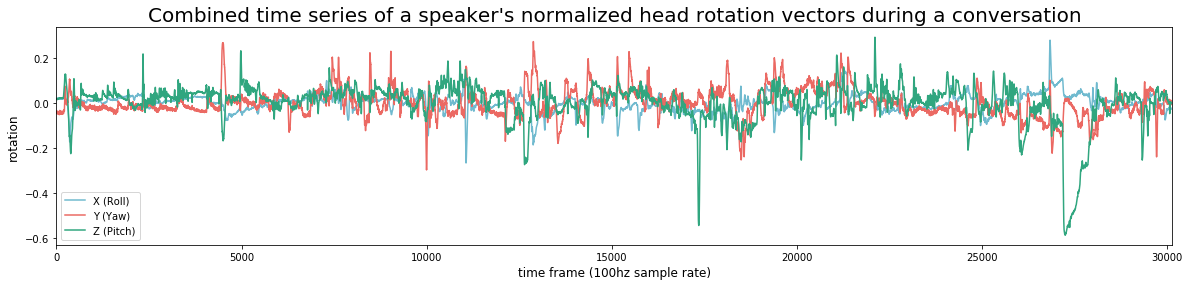

In [7]:
# Combine time series plots
colors = ['#70bacf', '#eb6963', '#30a67f']

# Configure figure size
rcParams['figure.figsize'] = 20, 4

ax = None

for i, r in enumerate(['Rx', 'Ry', 'Rz']):
    # Select the column for the rotation vector
    rov = rov_df[[r]]
    
    # Plot the signal for the rotation vector
    ax = rov.plot(color=colors[i], ax=ax)
    
# Modify the plot's label on the legend
ax.legend(['X (Roll)', 'Y (Yaw)', 'Z (Pitch)'])
    
# Set a joint X axis label
plt.xlabel('time frame (100hz sample rate)', fontsize=12)
# Set a joint Y axis label
plt.ylabel('rotation', rotation=90, labelpad=5, fontsize=12)

plt.title("Combined time series of a speaker's normalized head rotation vectors during a conversation", fontsize=20)
plt.show()

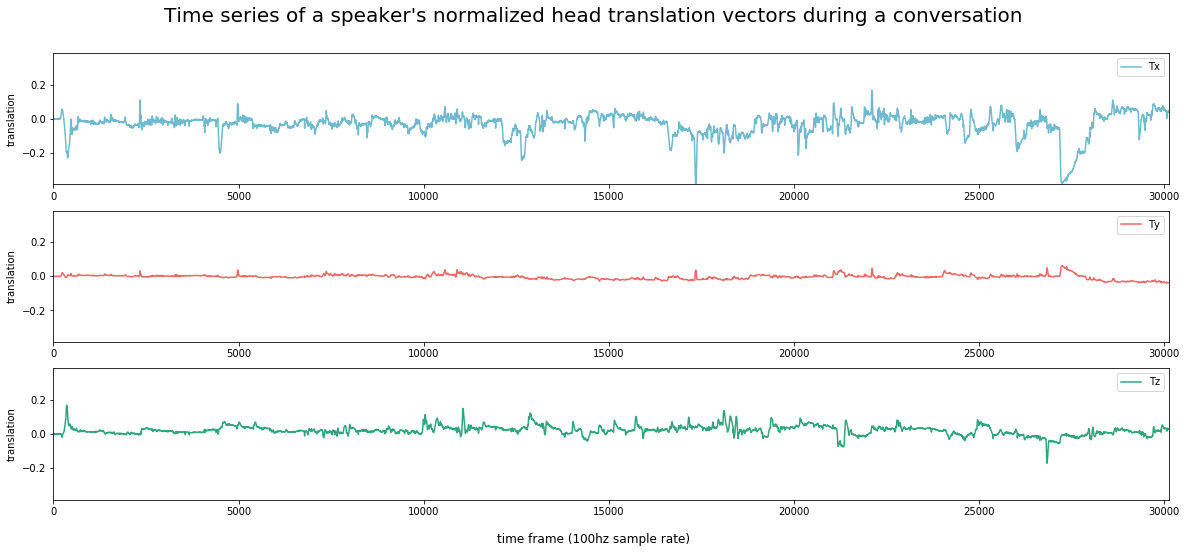

In [8]:
# Configure subplots, figure size, spacing and title
fig, axs = plt.subplots(3, 1, figsize=(20, 8))
fig.subplots_adjust(hspace=0.2, top=0.9) # Top gives space for title
fig.suptitle("Time series of a speaker's normalized head translation vectors during a conversation", fontsize=20)

for i, t in enumerate(['Tx', 'Ty', 'Tz']):
    # Select the column for the translation vector
    trans = trans_df[[t]]
    
    # Retrieve the plot axis object for this gesture
    ax = axs.flat[i]
    
    # Plot the signal for the rotation vector
    trans.plot(ax=ax, color=colors[i])
    
    # Make x axis scales the same
    scale = max((abs(trans_df.values.min()), abs(trans_df.values.max())))
    ax.set(ylim=(-scale, scale))
    
    # Modify the plot's label on the legend
    ax.legend([t])
    
    # Set y axis label
    ax.set_ylabel('translation', rotation=90, labelpad=5)
    
# Set a joint X axis label
fig.text(0.5, 0.05, 'time frame (100hz sample rate)', ha='center', fontsize=12)

plt.show()

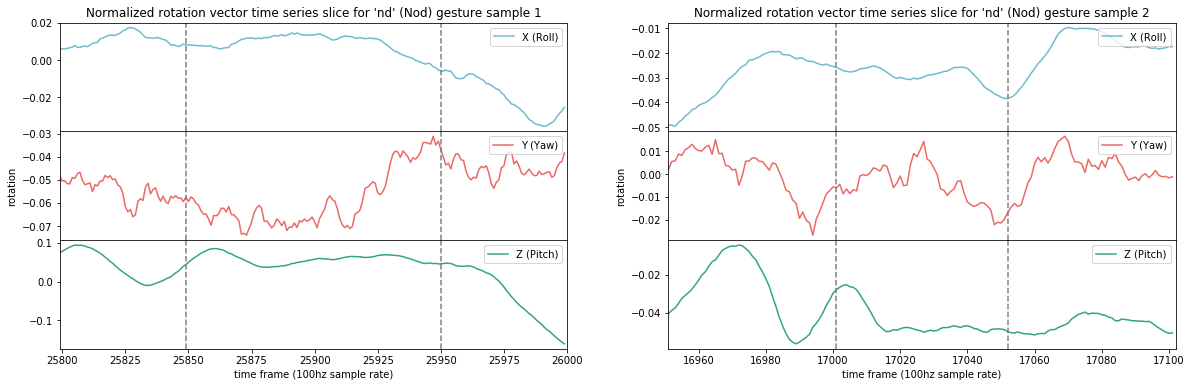

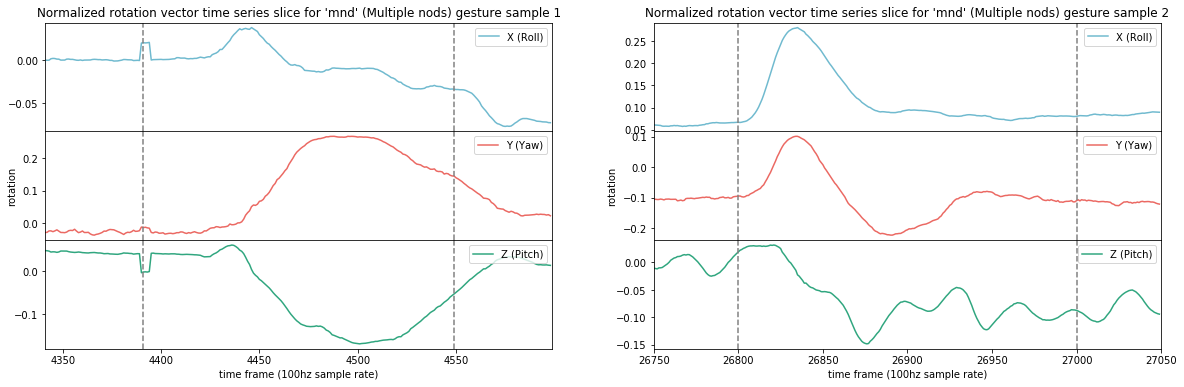

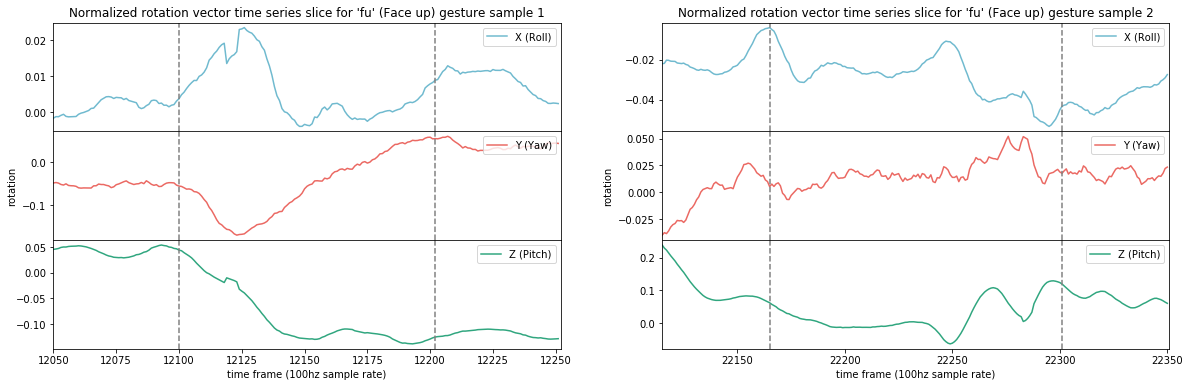

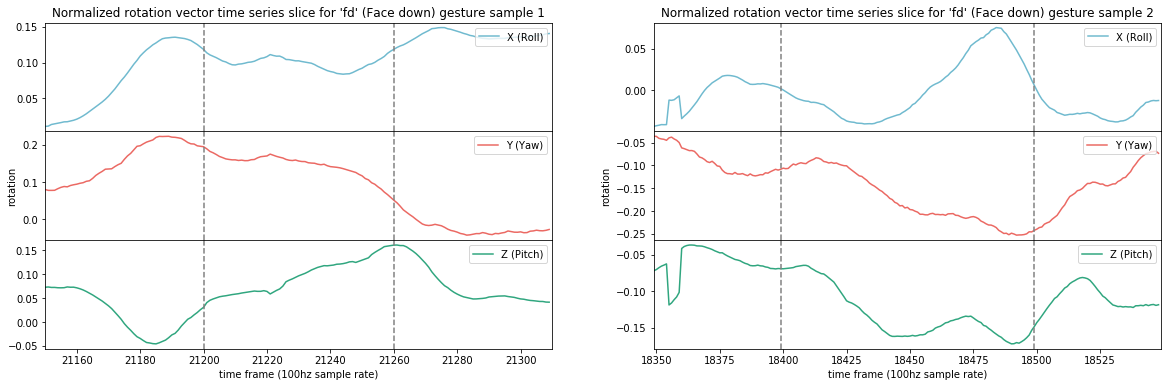

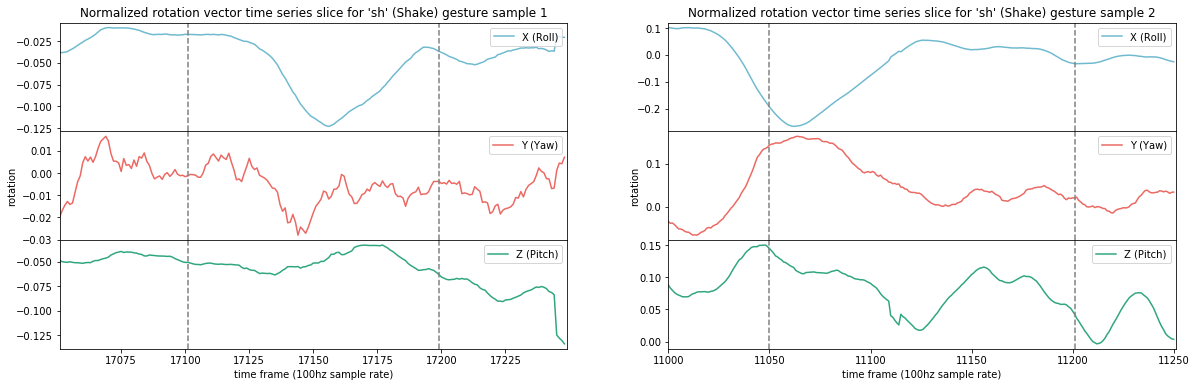

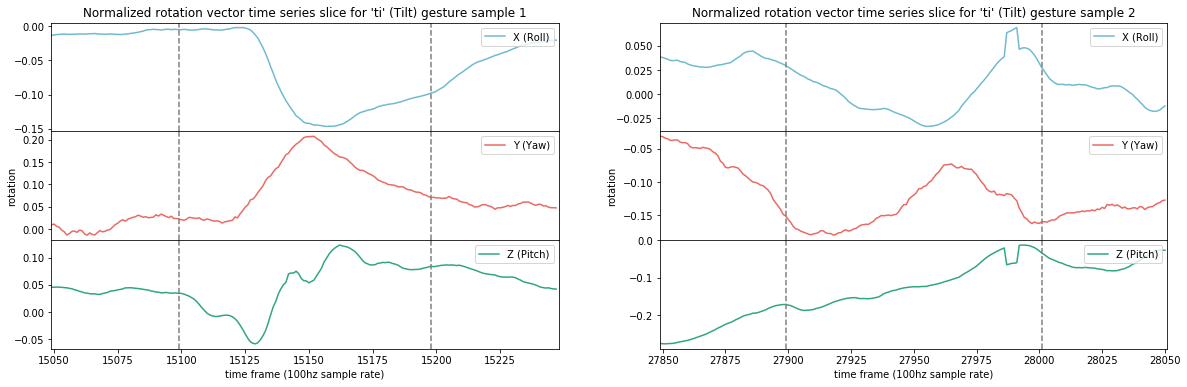

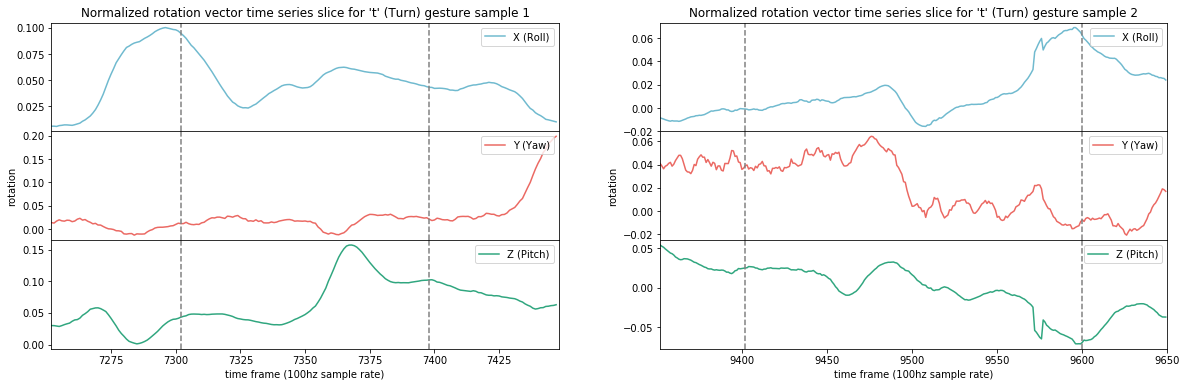

In [9]:
names = ['X (Roll)', 'Y (Yaw)', 'Z (Pitch)']

for i, (gesture, info) in enumerate(gestures.items()):
    # Extract a sub-dataframe for the gesture
    gesture_df = ann_df[ann_df['type'] == gesture]
    
    # Sample two series (gestures) from the sub-dataframe
    gsts = gesture_df.sample(2, random_state=1)
    
    fig = plt.figure(figsize=(20, 6))
    outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.3)
    
    for j in range(2):
        inner = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=outer[j], wspace=0.1, hspace=0)
        
        # Retrieve the first sample gesture
        _, start, end, duration = gsts.iloc[j]
        
        # Padding for the plot
        padding = 50
        
        # Restrict the rotation vector dataframe to the correct time range (with padding)
        padded_df = rov_df.iloc[(start-padding):(end+padding)]
        
        # Calculate Y axis scale
        scale = max((abs(padded_df.values.min()), abs(padded_df.values.max())))
        
        for k, r in enumerate(['Rx', 'Ry', 'Rz']):
            # Select the column for the rotation vector and select the time of the gesture
            rov = padded_df[[r]]
            
            # Plot the rotation vector time series
            ax = plt.Subplot(fig, inner[k])
            rov.plot(color=colors[k], ax=ax)
            
            if r != 'Rz': # Only show x ticks on the last subplot
                ax.set_xticks([])
            else: # Only show X label on the last subplot
                ax.set_xlabel('time frame (100hz sample rate)')
                
            if r == 'Ry': # Only show y label on the middle subplot
                ax.set_ylabel('rotation', rotation=90, labelpad=5)
        
            # Set axis scale
            #ax.set(ylim=(-scale, scale))
            ax.set(xlim=(start-padding, end+padding))
            
            # Draw gesture separators
            ax.axvline(x=start, color='grey', linestyle='dashed')
            ax.axvline(x=end, color='grey', linestyle='dashed')
            
            # Set legend labels
            ax.legend([names[k]], loc='upper right')
    
            if r == 'Rx': # Only show title above first subplot
                ax.set_title(f"Normalized rotation vector time series slice for '{gesture}' ({info[0]}) gesture sample {j+1}")
    
            fig.add_subplot(ax)
            
    plt.show()